In [83]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
train_df = pd.read_csv('train.csv', header=None)
test_df = pd.read_csv('test.csv', header=None)
train_df = train_df.drop(index=509)

In [85]:
train_df.columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']
test_df.columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']

In [86]:
cat_features = ['sex', 'smoker', 'region']
num_features = ['age', 'bmi', 'children']

In [87]:
train_df.charges = train_df.charges.astype(float)
train_df[num_features] = train_df[num_features].astype(float).fillna(0)
test_df[num_features] = test_df[num_features].astype(float).fillna(0)

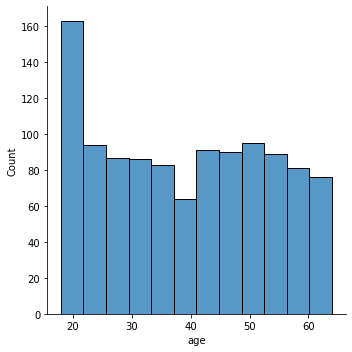

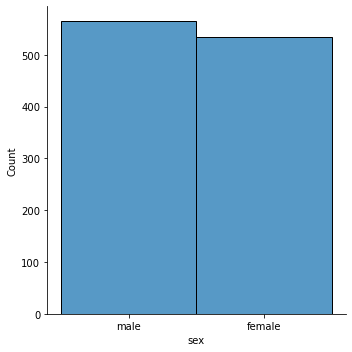

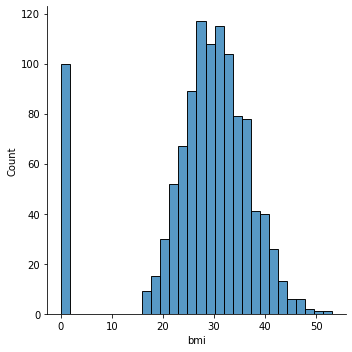

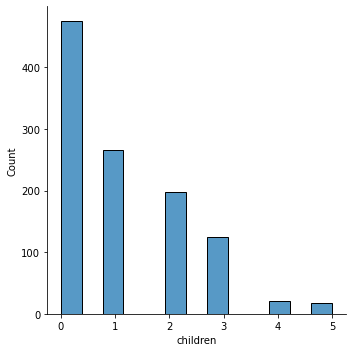

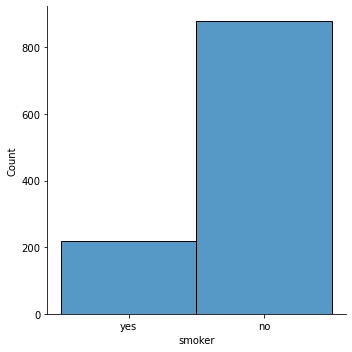

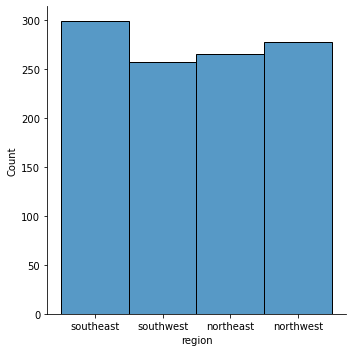

In [88]:
for f in train_df.columns[:-1]:
    
    sns.displot(train_df[f])
    plt.show()

In [89]:
ss = StandardScaler()
ss.fit(train_df[num_features])

StandardScaler()

In [90]:
train_df[num_features] = ss.transform(train_df[num_features])
test_df[num_features] = ss.transform(test_df[num_features])

In [91]:
# convert categorical features with one hot encoding
train_df = pd.concat((train_df, pd.get_dummies(train_df[cat_features])), axis=1)
train_df = train_df.drop(cat_features, axis=1) 

In [92]:
# convert categorical features with one hot encoding
# same for test
test_df = pd.concat((test_df, pd.get_dummies(test_df[cat_features])), axis=1)
test_df = test_df.drop(cat_features, axis=1)

In [96]:
train_df.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.038226,0.016438,0.303540,0.013337,-0.013337,0.026857,-0.026857,-0.002706,-0.011475,-0.009163,0.024153
bmi,0.038226,1.000000,0.013737,0.103878,-0.044402,0.044402,0.001779,-0.001779,-0.023141,-0.095420,0.150134,-0.036464
children,0.016438,0.013737,1.000000,0.069108,-0.012181,0.012181,-0.013485,0.013485,-0.024363,0.031035,-0.025212,0.019256
charges,0.303540,0.103878,0.069108,1.000000,-0.064527,0.064527,-0.778425,0.778425,0.007775,-0.063360,0.101733,-0.049746
sex_female,0.013337,-0.044402,-0.012181,-0.064527,1.000000,-1.000000,0.085979,-0.085979,-0.011757,0.008045,-0.005249,0.009138
sex_male,-0.013337,0.044402,0.012181,0.064527,-1.000000,1.000000,-0.085979,0.085979,0.011757,-0.008045,0.005249,-0.009138
smoker_no,0.026857,0.001779,-0.013485,-0.778425,0.085979,-0.085979,1.000000,-1.000000,-0.005060,0.060946,-0.102942,0.050752
smoker_yes,-0.026857,-0.001779,0.013485,0.778425,-0.085979,0.085979,-1.000000,1.000000,0.005060,-0.060946,0.102942,-0.050752
region_northeast,-0.002706,-0.023141,-0.024363,0.007775,-0.011757,0.011757,-0.005060,0.005060,1.000000,-0.328013,-0.344612,-0.311423
region_northwest,-0.011475,-0.095420,0.031035,-0.063360,0.008045,-0.008045,0.060946,-0.060946,-0.328013,1.000000,-0.355747,-0.321485


In [59]:
target = train_df.charges
train_df = train_df.drop('charges', axis=1)

test_df.shape[1] == train_df.shape[1]

True

In [60]:
# обучаем линейную регрессию с регуляризатором на l1 норму весов (lasso)
# перебор гиперпараметров включен в имплементации LassoCV
lasso_regression = LassoCV()

In [61]:
lasso_regression.fit(train_df, target)

LassoCV()

In [62]:
print('Train RMSE:', mean_squared_error(lasso_regression.predict(train_df), target)**0.5)

Train RMSE: 6329.776581023074


In [66]:
# predict for test set
test_predictions = lasso_regression.predict(test_df)

In [67]:
test_df['charges'] = test_predictions

In [68]:
test_df.to_csv('predictions4test.csv', index=False)